In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car_dataset = pd.read_csv("car data.csv")

In [3]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_dataset.shape

(301, 9)

In [5]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


# encoding  the categorical data 

In [17]:
#encoding Fuel_Type column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)


In [18]:
#encoding Seller_Type column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)


In [19]:
#encoding Transmission column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [20]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Spliting the data into Training data and Test Data

In [22]:
x = car_dataset.drop(["Car_Name","Selling_Price"],axis=1)
y = car_dataset['Selling_Price']

In [23]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [24]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [25]:
from sklearn.model_selection import train_test_split

In [27]:
x_train ,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=2)

In [29]:
print(x_train.shape,x_test.shape)

(270, 7) (31, 7)


In [30]:
print(y_train.shape,y_test.shape)

(270,) (31,)


# Linear model

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lin_reg_model = LinearRegression()

In [33]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

In [34]:
#prediction on the Training data
training_data_prediction = lin_reg_model.predict(x_train)

In [50]:
lin_reg_model.score(x_test,y_test)

0.8365766715024661

In [35]:
# R Squared Error
from sklearn.metrics import r2_score

In [36]:
error_score = r2_score(y_train,training_data_prediction)
print(error_score)

0.8799451660493705


# Visualize the actual prices and predicted prices

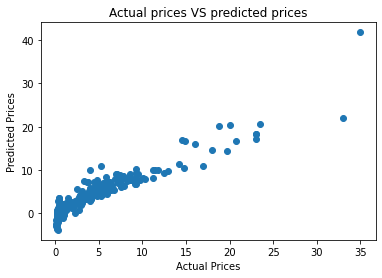

In [37]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual prices VS predicted prices")
plt.show()

In [38]:
# prediction on the test data
test_data_prediction = lin_reg_model.predict(x_test)

In [39]:
error_score = r2_score(y_test,test_data_prediction)
print(error_score)

0.8365766715024661


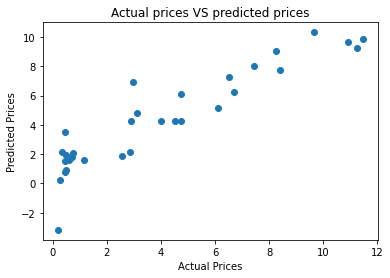

In [40]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual prices VS predicted prices")
plt.show()

# Lasso Regression

In [41]:
from sklearn.linear_model import Lasso

In [42]:
lasso_reg_model = Lasso()

In [43]:
lasso_reg_model.fit(x_train,y_train)

Lasso()

In [44]:
#prediction on the Training data
training_data_prediction = lasso_reg_model.predict(x_train)
error_score = r2_score(y_train,training_data_prediction)
print(error_score)

0.8427856123435793


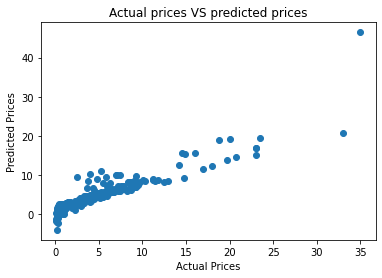

In [45]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual prices VS predicted prices")
plt.show()

In [46]:
# prediction on the test data
test_data_prediction = lasso_reg_model.predict(x_test)
error_score = r2_score(y_test,test_data_prediction)
print(error_score)

0.8709167941173195


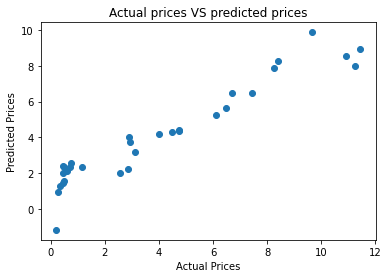

In [47]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual prices VS predicted prices")
plt.show()

In [51]:
lasso_reg_model.score(x_test,y_test)

0.8709167941173195

In [52]:
prediction = lasso_reg_model.predict(x_test)

In [54]:
print(prediction)

[ 9.87888122  1.42396266  4.33267834  3.17313445  8.95590579  4.29397384
  3.73913632  5.66283974  0.91478394  5.25514316  6.47238818  4.39507335
  1.2955156   8.26559961  2.00292338  2.32529219  2.55349653  2.34742172
  7.96895166  4.18441245  2.3369918   7.86598537  2.02308236  8.56734786
  1.55498136  6.48561097  2.11427451 -1.18422036  4.01710445  2.21749695
  2.41820898]


In [61]:
pred = lasso_reg_model.predict(np.array([[2015,12.00,100000.00,1,1,1,0]]))

C:\Users\Prem Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [62]:
print(pred)

[6.93228339]


In [63]:
import joblib

In [66]:
joblib.dump(lasso_reg_model,"car_prices_prediction.pkl")

['car_prices_prediction.pkl']

In [67]:
model = joblib.load("car_prices_prediction.pkl")

In [85]:
pred = model.predict(np.array([[2013,6.79,32000,0,0,1,0]]))

C:\Users\Prem Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [86]:
print(pred)

[4.06172992]


In [84]:
car_dataset.sample(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
157,Yamaha FZ S V 2.0,2015,0.48,0.84,23000,0,1,0,0
221,i20,2013,4.50,6.79,32000,0,0,1,0
140,Honda CBR 150,2013,0.60,1.20,32000,0,1,0,0
